# Beginner Intro to Neural Networks

## Beginner Intro to Neural Networks 1: Data and Graphing  
https://www.youtube.com/watch?v=ZzWaow1Rvho

In [1]:
import numpy as np
import pandas as pd

In [2]:
color = [ "red", "blue" ] * 4 + [np.nan]
length = [3, 2, 4, 3, 3.5, 2, 5.5, 1, 4.5]
width = [1.5, 1, 1.5, 1, .5, .5, 1, 1, 1]

dictionary = {"clr": color, "len": length, "wid": width}
df = pd.DataFrame(dictionary)

df.replace(["red", "blue"], [0, 1], inplace=True)

In [3]:
df

,clr,len,wid
0,0.0,3.0,1.5
1,1.0,2.0,1.0
2,0.0,4.0,1.5
3,1.0,3.0,1.0
4,0.0,3.5,0.5
5,1.0,2.0,0.5
6,0.0,5.5,1.0
7,1.0,1.0,1.0
8,NaN,4.5,1.0


In [4]:
np.binary_repr(231)

'11100111'

## Beginner Intro to Neural Networks 4: First Neural Network in Python
https://www.youtube.com/watch?v=gwitf7ABtK8

In [5]:
import numpy as np
import pandas as pd

In [6]:
def NN(m1, m2, w1, w2, b): # inputs, weights, and bias
    z = m1 * w1 + m2 *w2 + b
    return sigmoid(z)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

Need to input some values. For weights, lets use some random numbers

In [7]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

In [8]:
color = [ "red", "blue" ] * 4 + [np.nan]
length = [3, 2, 4, 3, 3.5, 2, 5.5, 1, 4.5]
width = [1.5, 1, 1.5, 1, .5, .5, 1, 1, 1]

In [9]:
dictionary = {"clr": color, "len": length, "wid": width}
df = pd.DataFrame(dictionary)

In [10]:
df.replace(["red", "blue"], [0, 1], inplace=True)

In [11]:
i = 0
m1 = df.len[i]
m2 = df.wid[i]
NN(m1, m2, w1, w2, b)

0.516494757005194

In [12]:
i = 1
m1 = df.len[i]
m2 = df.wid[i]
NN(m1, m2, w1, w2, b)

0.6017901033950531

In [13]:
i = 2
m1 = df.len[i]
m2 = df.wid[i]
NN(m1, m2, w1, w2, b)

0.38738240368626453

In [14]:
i = 3
m1 = df.len[i]
m2 = df.wid[i]
NN(m1, m2, w1, w2, b)

0.4721782438608326

## Beginner Intro to Neural Networks 5: Squared Error Cost Function
https://www.youtube.com/watch?v=c6NBkkKNZXw

The cost function takes in the data and the predictions made and outputs a number.  We interpret this number as how bad our predictions were (how far the predictions are from the data).  
So we want to minimize this number, which shows we're getting closer.  We can't change the data, but we can change the weights and bias.  

Cost function will take the prediction and the true target value, and output a number.  
Cost function: ( prediction - true value ) ^2  
this cost function is the squared error cost function. In order to change this, we'll adjust the weights and bias of our Neural Network.

(prediction - target)**2  
The prediction will always be 'b'  [ = NN() ]  
( b - target ) ^2  <-- try to minimize this by changing the value of b
Graph this and we get a parabola that is 0 when you hit the target value and positive when not zero. to get to the target value, look at the slope of the value (positive or negative slope).  Subtract a negative number to move to the right. do this by subtracting b, going slower (learning rate) as you get closer.

How do you get the slope (derivative) of the cost fucntion at (with respect to) b? Calculus!

## Beginner Intro to Neural Networks 6: Slope of the Cost Function
https://www.youtube.com/watch?v=Gvq9sUHPgrc

Cost function:  
cost(b) = (b - 4)^2  
x, y coordinates = b, cost(b)  
Use slope(b)  If negative move to the right, pos, move left  
b = b - 0.1 * slope(b)  

How to get slope(b) ???  
We'll derive it numerically, algebraically, and calculus-ly  

Numerically:  
slope = ( rise / run )
Change the value by step size h  
Using x and y coords before and after:  
run = b + h - b, or just h  
rise = cost(b+h) - cost(b)  
slope = rise / run  so...  
slope(b) = (cost(b+h)-cost(b))/h  
Note: the smaller h is, the better the approximation  

Now, our approximation works for multiple functions.  
Can use for sin(b)  
sigmoid ... 1/(1+e**-b)  
Detriment of this is that it's an approximation and it's computationally expensive.

Let's derive the slope of our cost function next:  
slope ~= 2(b-target) + h , but we can forget about h because it's a tiny approximation, so just...  
slope = 2 ( b - target ) 

Now let's try using calculus (the power rule):  
f(x) = x^2  
Derivative of this function is:  
(d/dx)f(x) = 2x^1 or 2x  
Move exponent to front and reduce exponent by one, so derivative of x^4 is:  
4x^3  
Derivative of x^y is yx^y-1  
(b-4)^2 is 2(b-4)

## Beginner Intro to Neural Networks 7: Slope of Cost + Simple Train in Python
https://www.youtube.com/watch?v=EnGmg-kvpYs

In [15]:
def cost(b):
    return (b - 4)**2

In [16]:
cost(0)

16

In [17]:
cost(2)

4

In [18]:
cost(4)

0

In [19]:
def num_slope(b):
    h = 0.0001
    return (cost(b+h) - cost(b))/h

In [20]:
num_slope(3)

-1.9999000000037181

In [21]:
num_slope(5)

2.000099999994731

In [22]:
def slope(b):
    return 2 * (b - 4)#**1

In [23]:
slope(3)

-2

In [24]:
slope(5)

2

In [25]:
b = 8

In [26]:
b = b - .1 * slope(b)
print(b)

7.2


Run repeatedly as needed

In [27]:
for i in range(3):
    print(i)

0
1
2


In [28]:
b = 0
# training loop, minimizing cost and changing the output of our simple NN
for i in range(10):
    b = b - .1 * slope(b)
    print(b)

0.8
1.4400000000000002
1.952
2.3616
2.68928
2.9514240000000003
3.1611392
3.32891136
3.463129088
3.5705032704


## Beginner Intro to Neural Networks 8: Linear Regression
https://www.youtube.com/watch?v=GwVTM28HKYk

Pats vs wags:

In [29]:
df = pd.DataFrame(list(zip([1,2,4], [2,4,5])), columns=['pats', 'wags'])

In [30]:
df

,pats,wags
0,1,2
1,2,4
2,4,5


In [31]:
def wags(pats):
    return w * pats + b

In [32]:
w = .25 # slope
b = .68 # y-intercept

In [33]:
df['wp'] =  df.pats.apply(lambda x: wags(x))

In [34]:
df

,pats,wags,wp
0,1,2,0.93
1,2,4,1.18
2,4,5,1.68


In [35]:
w = 1
b = 1.3

In [36]:
df['wp'] =  df.pats.apply(lambda x: wags(x))
df

,pats,wags,wp
0,1,2,2.3
1,2,4,3.3
2,4,5,5.3


## Beginner Intro to Neural Networks 9: Linear Regression Cost
https://www.youtube.com/watch?v=fh1QZ97izSM

In [37]:
df = pd.DataFrame(list(zip([1,2,4], [2,4,5])), columns=['pats', 'wags'])

In [38]:
def wags(pats):
    return pats * w + b

In [39]:
w = 0.63
b = 2.13

In [40]:
df['wp'] =  df.pats.apply(lambda x: wags(x))
df

,pats,wags,wp
0,1,2,2.76
1,2,4,3.39
2,4,5,4.65


Minimize the (squared) difference betwen the actual and predicted values by adding the errors.

In [41]:
df['err'] = (df.wags-df.wp)**2
print("SSE:", df.err.sum())
df

SSE: 1.0721999999999998


,pats,wags,wp,err
0,1,2,2.76,0.5776
1,2,4,3.39,0.3721
2,4,5,4.65,0.1225


In [42]:
w = 0.83
b = 1.17

In [43]:
df['wp'] =  df.pats.apply(lambda x: wags(x))
df['err'] = (df.wags-df.wp)**2
print("SSE:", df.err.sum())
df

SSE: 1.6289999999999996


,pats,wags,wp,err
0,1,2,2.00,0.0000
1,2,4,2.83,1.3689
2,4,5,4.49,0.2601


If we bring Cost (error) down to zero, we've found the best fit for all the data.  
We try to minimize this.

Cost = sigma  ( model(xi) - targeti ) ^2  

Can add 1/m in front of sigma where m is the number of data points, giving you the average squared error, which is nice when you have different numbers of data points and you want to keep your step size the same.

## Beginner Intro to Neural Networks 10: Finding Linear Regression Parameters
https://www.youtube.com/watch?v=bP2SCk-QGkw

Find the best parameters for w and b for our linear regression model.

In [44]:
w = 0.01
b = 0.01

Parameter updates:  
w = w+alpha\*dcdw(w,b) = #.##  
b = b+alpha\*dcdb(w,b) = #.##  

We want to know the slope of the cost in both the w and b dimensions.  
We have to take the partial derivative with respect to each.

Partial derivatives of cost w.r.t. w and b:  

dcdw(w,b) = 2 * (w*1 + b-2)*1 + 2 * (w*2 + b-4)*2 + 2 * (w*4 + b - 5)*4   \n  
dcdb(w,b) = 2 * (w*1 + b-2)   + 2 * (w*2 + b-4)   + 2 * (w*4 + b - 5)  
dcdw(w,b) = -432.03  
dcdb(w,b) = -150.85  

Now, we actually want to *subtract* (not add) a fraction of these numbers to *minimize* cost without overshooting.

## Beginner Intro to Neural Networks 12: Neural Network in Python from Scratch
https://www.youtube.com/watch?v=LSr96IZQknc  
https://www.youtube.com/watch?v=LSr96IZQknc&list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So&index=14

In [45]:
%matplotlib inline

In [46]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [47]:
color = [ "red", "blue" ] * 4 + [np.nan]
length = [3, 2, 4, 3, 3.5, 2, 5.5, 1, 4.5]
width = [1.5, 1, 1.5, 1, .5, .5, 1, 1, 1]

dictionary = {"clr": color, "len": length, "wid": width}
df = pd.DataFrame(dictionary)

df.replace(["red", "blue"], [0, 1], inplace=True)

In [48]:
df

,clr,len,wid
0,0.0,3.0,1.5
1,1.0,2.0,1.0
2,0.0,4.0,1.5
3,1.0,3.0,1.0
4,0.0,3.5,0.5
5,1.0,2.0,0.5
6,0.0,5.5,1.0
7,1.0,1.0,1.0
8,NaN,4.5,1.0


In [49]:
data = [[3  , 1.5, 1],
        [2  , 1  , 0],
        [4  , 1.5, 1],
        [3  , 1  , 0],
        [3.5, .5 , 1],
        [2  , .5 , 0],
        [5.5, 1  , 1],
        [1  , 1  , 0]]

mystery_flower = [4.5, 1]

In [50]:
data[1]

[2, 1, 0]

In [51]:
data[1][0]

2

In [52]:
# network

#   o    flower type
#  / \   w1, w2, b
# o   o  length, width

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

In [53]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [54]:
T = np.linspace(-5, 5, 10)
T

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [55]:
Y = sigmoid(T)
Y

array([0.00669285, 0.02005754, 0.0585369 , 0.1588691 , 0.36457644,
       0.63542356, 0.8411309 , 0.9414631 , 0.97994246, 0.99330715])

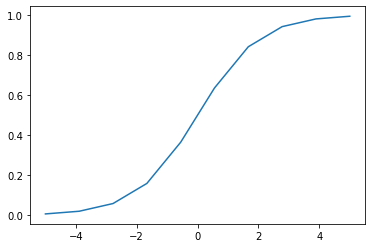

In [56]:
plt.plot(T, Y)

Can smoothe this line by increasing third value in linspace()  
Can sharpen/increase/squash the sigmoid curve by increasing the domain (1st & 2nd values) in linspace()

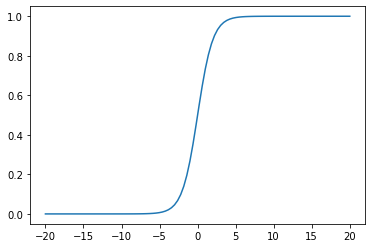

In [57]:
T = np.linspace(-20, 20, 100)
Y = sigmoid(T)
plt.plot(T,Y)

In [58]:
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

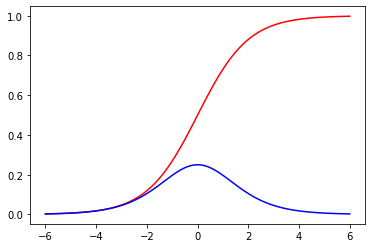

In [59]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

The blue line is a graph of the slope of the red line.

In [60]:
# training loop (a list of 100 random points from our data)

for i in range(100):
    ri = np.random.randint(len(data))  # random index
    point = data[ri]
#     print(point)

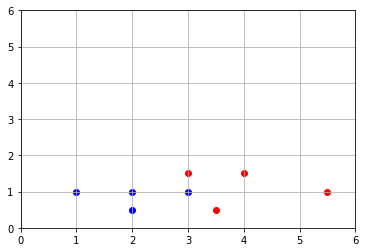

In [61]:
# scatter plot of data
plt.axis([0,6,0,6])  # xmin, xmax, ymin, ymax
plt.grid()  # adds a grid
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c=color)

In [87]:
data

[[3, 1.5, 1],
 [2, 1, 0],
 [4, 1.5, 1],
 [3, 1, 0],
 [3.5, 0.5, 1],
 [2, 0.5, 0],
 [5.5, 1, 1],
 [1, 1, 0]]

In [63]:
# network

#   o    flower type
#  / \   w1, w2, b
# o   o  length, width

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

In [64]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [85]:
np.random.randn()

-0.8088413645576321

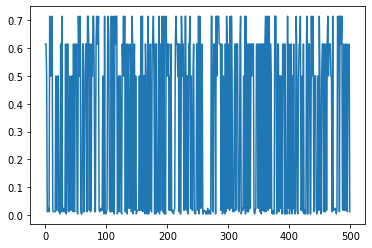

In [91]:
# training loop (a list of 100 random points from our data)

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

learning_rate = 0.2
costs = []

for i in range(50000):
    ri = np.random.randint(len(data))  # random index
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
#     cost = (pred - target)**2
    cost = np.square(pred - target)
#     print(target, cost)
 
#     if i % 1000 == 0:
#         print(cost)

#     costs.append(cost)
    
#     # get the derivative of the cost
#     dcost_pred = 2 * (pred - target)
#     dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db  = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db  = dcost_dz * dz_db

#     w1 = w1 - learning_rate * dcost_dw1
#     w2 = w2 - learning_rate * dcost_dw2
#     b  = b  - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

## Start fresh

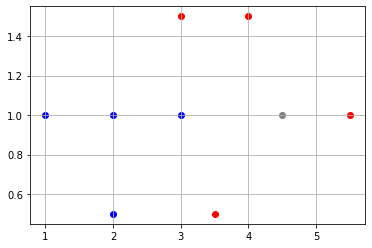

In [121]:
# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

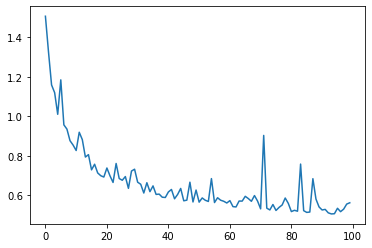

In [122]:
# train

def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [123]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9855113082725184
close to 0 -> blue, close to 1 -> red


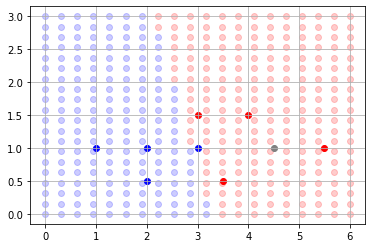

In [124]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()

#### Make your computer talk

In [125]:
from win32com.client import Dispatch

In [126]:
speak = Dispatch("SAPI.SpVoice").Speak

In [127]:
# speak("hello world")

In [128]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < 0.5:
        speak("blue")
    else:
        speak("red")

In [131]:
which_flower(3, .5)

In [130]:
data

[[3, 1.5, 1],
 [2, 1, 0],
 [4, 1.5, 1],
 [3, 1, 0],
 [3.5, 0.5, 1],
 [2, 0.5, 0],
 [5.5, 1, 1],
 [1, 1, 0]]